In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt


In [4]:
data = pd.read_csv('DrNykterstein.csv')

In [5]:
data.shape

(8686, 634)

In [6]:
data = data[['Date', 'White', 'Black', 'Result', 'WhiteElo', 'BlackElo', 
             'WhiteRatingDiff', 'BlackRatingDiff', 'Variant', 'Opening', 'TimeControl', 'Termination']]



In [7]:
data.head()

,Date,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,Variant,Opening,TimeControl,Termination
0,2021.07.03,DrNykterstein,mutdpro,1-0,3098,2801,4,-2,Standard,Sicilian Defense: Accelerated Dragon Modern V...,180+0,Normal
1,2021.07.03,sumsar42,DrNykterstein,1-0,2820,3118,10,-20,Standard,King's Indian Attack: Spassky Variation,180+0,Normal
2,2021.07.03,DrNykterstein,Jasugi99,1-0,3116,2679,2,0,Standard,St. George Defense: Polish Variation,180+0,Normal
3,2021.07.03,Chesstoday,DrNykterstein,1-0,2825,3136,10,-20,Standard,Scotch Game: Classical Variation,180+0,Normal
4,2021.07.03,DrNykterstein,Alexsur81,1-0,3133,2810,3,-2,Standard,King's Indian Attack,180+0,Normal


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8686 entries, 0 to 8685
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             8686 non-null   object
 1   White            8686 non-null   object
 2   Black            8686 non-null   object
 3   Result           8686 non-null   object
 4   WhiteElo         8686 non-null   int64 
 5   BlackElo         8686 non-null   int64 
 6   WhiteRatingDiff  8686 non-null   int64 
 7   BlackRatingDiff  8686 non-null   int64 
 8   Variant          8686 non-null   object
 9   Opening          8686 non-null   object
 10  TimeControl      8686 non-null   object
 11  Termination      8686 non-null   object
dtypes: int64(4), object(8)
memory usage: 814.4+ KB


In [9]:
data.shape

(8686, 12)

In [10]:
data.isna().sum()

Date               0
White              0
Black              0
Result             0
WhiteElo           0
BlackElo           0
WhiteRatingDiff    0
BlackRatingDiff    0
Variant            0
Opening            0
TimeControl        0
Termination        0
dtype: int64

In [11]:
data.isnull().sum()

Date               0
White              0
Black              0
Result             0
WhiteElo           0
BlackElo           0
WhiteRatingDiff    0
BlackRatingDiff    0
Variant            0
Opening            0
TimeControl        0
Termination        0
dtype: int64

In [12]:
# unique values
data.nunique()


Date                188
White               293
Black               307
Result                3
WhiteElo            984
BlackElo            992
WhiteRatingDiff      73
BlackRatingDiff      70
Variant               2
Opening            1027
TimeControl           6
Termination           3
dtype: int64

In [13]:
data['TotalGames'] = data['White'] + data['Black']

In [14]:
data['Result'].value_counts()

1-0        4247
0-1        3736
1/2-1/2     703
Name: Result, dtype: int64

In [15]:
data['Result'].replace(['1-0', '0-1', '1/2-1/2'], ['White wins', 'Black wins', 'Draw'], inplace=True)

In [16]:
#removing draw games
data = data[data['Result'] != 'Draw']

<AxesSubplot:ylabel='Result'>

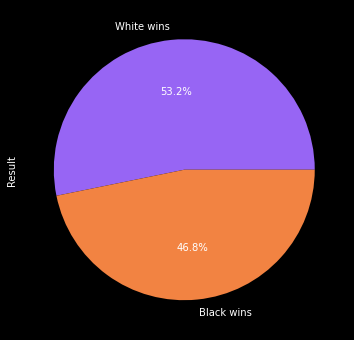

In [17]:
data['Result'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=['#9765F4', '#f28342', '#0000ff'])

In [18]:
#removing month and year from date
data['Year'] = data['Date'].str.split('.').str[0]
data['Month'] = data['Date'].str.split('.').str[1]

In [19]:
# removing date column
data.drop(['Date'], axis=1, inplace=True)

<AxesSubplot:>

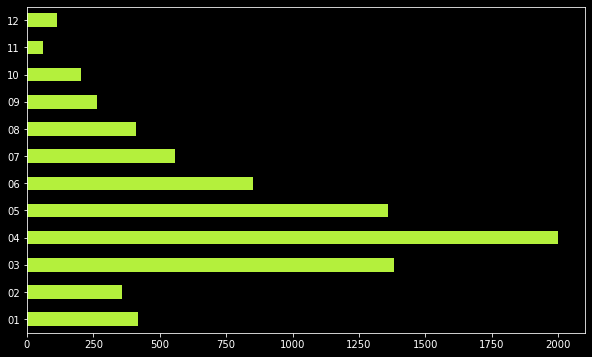

In [20]:
# total number of games played by month
data['Month'].value_counts().sort_index().plot(kind='barh', figsize=(10,6), color='#b4f03c')

<AxesSubplot:>

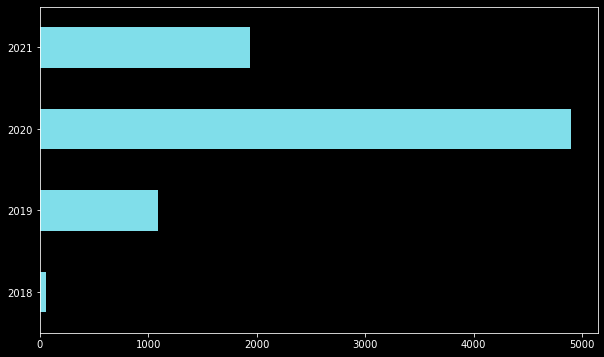

In [21]:
# total number of games played by year
data['Year'].value_counts().sort_index().plot(kind='barh', figsize=(10,6), color='#80DEEA')

In [22]:
data['Termination'].value_counts()

Normal          6808
Time forfeit    1172
Abandoned          3
Name: Termination, dtype: int64

In [23]:
# remove abandoned games
data = data[data['Termination'] != 'Abandoned']

In [24]:
data['TimeControl'].value_counts()

60+0     7578
180+0     162
15+0       90
180+2      86
30+0       51
300+0      13
Name: TimeControl, dtype: int64

In [25]:
data['TimeControl'].replace(['15+0'], 'Rapid (15 min)', inplace=True)
data['TimeControl'].replace(['30+0', '60+0'], 'Classical (60 min)', inplace=True)
data['TimeControl'].replace(['180+0', '180+2', '300+0'], 'Long Classical (180 min)', inplace=True)

In [26]:
data['WhiteElo'] = pd.to_numeric(data['WhiteElo'], errors='coerce')
data['BlackElo'] = pd.to_numeric(data['BlackElo'], errors='coerce')

In [27]:
# replace the range of white and black elo with a single value
data['WhiteElo'].replace(range(900, 1200), 'Begineer', inplace=True)
data['WhiteElo'].replace(range(1201, 1500), 'Ameture', inplace=True)
data['WhiteElo'].replace(range(1501, 1800), 'Intermediate', inplace=True)
data['WhiteElo'].replace(range(1801, 2200), 'Expert', inplace=True)
data['WhiteElo'].replace(range(2201, 2600), 'Master', inplace=True)
data['WhiteElo'].replace(range(2601, 2800), 'International Master', inplace=True)
data['WhiteElo'].replace(range(2801, 3000), 'Grand Master', inplace=True)
data['WhiteElo'].replace(range(3001, 3400), 'Super Grand Master', inplace=True)

data['BlackElo'].replace(range(900, 1200), 'Begineer', inplace=True)
data['BlackElo'].replace(range(1201, 1500), 'Ameture', inplace=True)
data['BlackElo'].replace(range(1501, 1800), 'Intermediate', inplace=True)
data['BlackElo'].replace(range(1801, 2200), 'Expert', inplace=True)
data['BlackElo'].replace(range(2201, 2600), 'Master', inplace=True)
data['BlackElo'].replace(range(2601, 2800), 'International Master', inplace=True)
data['BlackElo'].replace(range(2801, 3000), 'Grand Master', inplace=True)
data['BlackElo'].replace(range(3001, 3400), 'Super Grand Master', inplace=True)


In [28]:
#  removing text after ':' in opening column
data['Opening'].replace(regex=True, inplace=True, to_replace=r':.*', value='')

<AxesSubplot:>

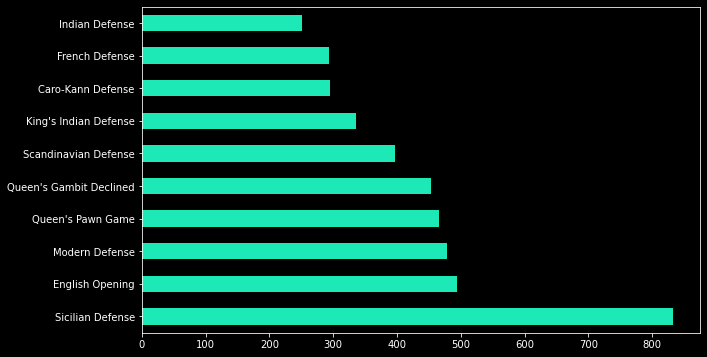

In [29]:
# top 10 openings
data['Opening'].value_counts().head(10).plot(kind='barh', figsize=(10,6), color='#1DE9B6')

In [30]:
data.drop(['TotalGames'] , axis=1, inplace=True)

In [31]:
data['Result'] = data['Result'].replace(['White wins', 'Black wins'], ['1', '0'])

In [32]:
data.head(5)

,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,Variant,Opening,TimeControl,Termination,Year,Month
0,DrNykterstein,mutdpro,1,Super Grand Master,Grand Master,4,-2,Standard,Sicilian Defense,Long Classical (180 min),Normal,2021,07
1,sumsar42,DrNykterstein,1,Grand Master,Super Grand Master,10,-20,Standard,King's Indian Attack,Long Classical (180 min),Normal,2021,07
2,DrNykterstein,Jasugi99,1,Super Grand Master,International Master,2,0,Standard,St. George Defense,Long Classical (180 min),Normal,2021,07
3,Chesstoday,DrNykterstein,1,Grand Master,Super Grand Master,10,-20,Standard,Scotch Game,Long Classical (180 min),Normal,2021,07
4,DrNykterstein,Alexsur81,1,Super Grand Master,Grand Master,3,-2,Standard,King's Indian Attack,Long Classical (180 min),Normal,2021,07


In [33]:
# Distributing in categorical variables and numeric variables
cat_vars = data.select_dtypes(include=['object']).columns
num_vars = data.select_dtypes(exclude=['object']).columns


In [34]:
cat_vars

Index(['White', 'Black', 'Result', 'WhiteElo', 'BlackElo', 'Variant',
       'Opening', 'TimeControl', 'Termination', 'Year', 'Month'],
      dtype='object')

In [35]:
num_vars

Index(['WhiteRatingDiff', 'BlackRatingDiff'], dtype='object')